In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def S(r:float):
    """ Integral de traslape molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-r) * ((1/3) * np.square(r) + r + 1)

In [3]:
def J(r:float):
    """ Integral Coulombiana molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-2*r) * (1 + 1/r) - (1/r)

In [4]:
def K(r:float):
    """ Integral de intercambio molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return -np.exp(-r) * (1+r)

In [5]:
def HAA(r):
    return -1/2 + 1/r + J(r)

In [6]:
def HAB(r):
    return (1/r - 1/2)*S(r) + K(r)

In [7]:
def E(r:np.ndarray, signo:int):
    """ Energía molécula de hidrógeno ionizada

    Parámetros
        r : distancia interatómica
        signo : (1,-1) es el caso (ligante, antiligante)
    """
    return (HAA(r) + signo*HAB(r))/(1 + signo*S(r))

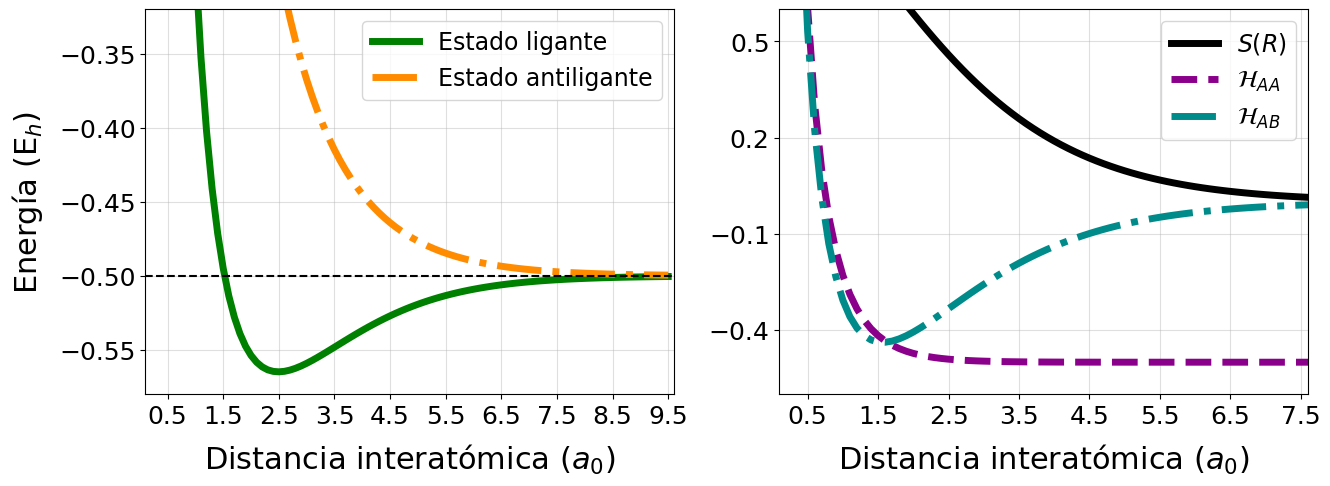

In [56]:
linewidth, fontsize, labelsize, alpha = 5, 22, 18, 0.4
name = 'energia_ion_hidrogeno_molecular'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
###################
### Gráfica derecha
###################
r1min, r1max = 0.5, 9.6
r1 = np.arange(r1min, r1max, 0.1)
# plots
axs[0].plot(r1, E(r1,1), label='Estado ligante', linewidth=linewidth, color='green', linestyle='-')
axs[0].plot(r1, E(r1,-1), label='Estado antiligante', linewidth=linewidth, color='darkorange', linestyle='-.')
axs[0].axhline(y = -0.5, color='black', linestyle='dashed')
# x config
axs[0].set_xticks(np.arange(0.5, 9.6, 1))
axs[0].set_xlim(0.1, 9.6)
axs[0].set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
# y config
y1min, y1max = -0.57, 0.7
axs[0].set_yticks(np.arange(-0.55, y1max, 0.05))
axs[0].set_ylim(-0.58, -0.32)
axs[0].set_ylabel('Energía (E$_h$)', fontsize=fontsize, labelpad=10)
# plot config
axs[0].tick_params(axis='both', which='major', labelsize=labelsize)

#####################
### Gráfica izquierda
#####################
r2 = np.arange(0.1, 8.6, 0.1)
# plots
axs[1].plot(r2, S(r2), label=r'$S(R)$', linewidth=linewidth, color='black', linestyle='-')
axs[1].plot(r2, HAA(r2), label=r'$\mathcal{H}_{AA}$', linewidth=linewidth, color='darkmagenta', linestyle='--')
axs[1].plot(r2, HAB(r2), label=r'$\mathcal{H}_{AB}$', linewidth=linewidth, color='darkcyan', linestyle='-.')
# x config
r2min, r2max = 0.5, 7.6
axs[1].set_xticks(np.arange(r2min, r2max, 1))
axs[1].set_xlim(left=r2min-0.4, right=r2max)
axs[1].set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
# y config
y2min = -0.9
axs[1].set_yticks(np.arange(-1, 1, 0.3))
axs[1].set_ylim(-0.6, 0.6)
# plot config
axs[1].tick_params(axis='both', which='major', labelsize=labelsize)

for ax in axs:
    ax.legend(fontsize=17, loc='upper right')
    ax.grid(alpha=alpha)

fig.subplots_adjust(wspace=0.2)

plt.savefig(f"imgs/{name}.svg", format="svg", bbox_inches='tight')
plt.show()